# Task 02

## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Information about the dataset

In [14]:
df = pd.read_csv("C:/Users/pkg15/Downloads/titanic.csv")
display(df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

## Data cleaning

#### 1) Missing values

In [19]:
print(df.isnull().sum())
df = df.drop(columns=['Cabin']) 
df['Age'].fillna(df['Age'].median(), inplace=True) 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### 2) Data types

In [16]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### 3) Duplicates

In [17]:
df.drop_duplicates(inplace = True)

## Exploratory data analysis

#### 1) Summary statistics

In [21]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

#### 2)Visualizations

#### i) Survival Rate By Class

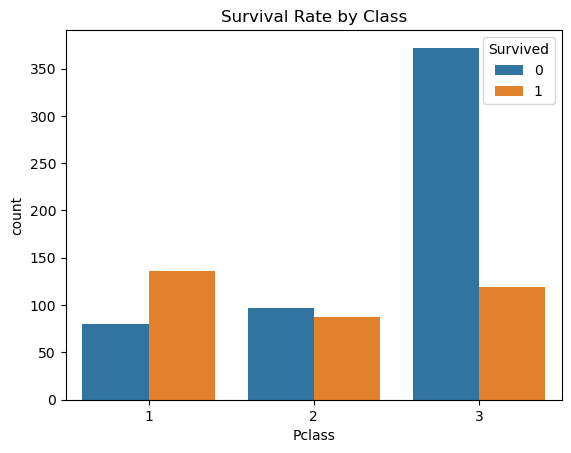

In [24]:

sns.countplot(x='Pclass', hue='Survived', data=titanic) 
plt.title('Survival Rate by Class')
plt.show()

#### ii)Survival Rate By Gender

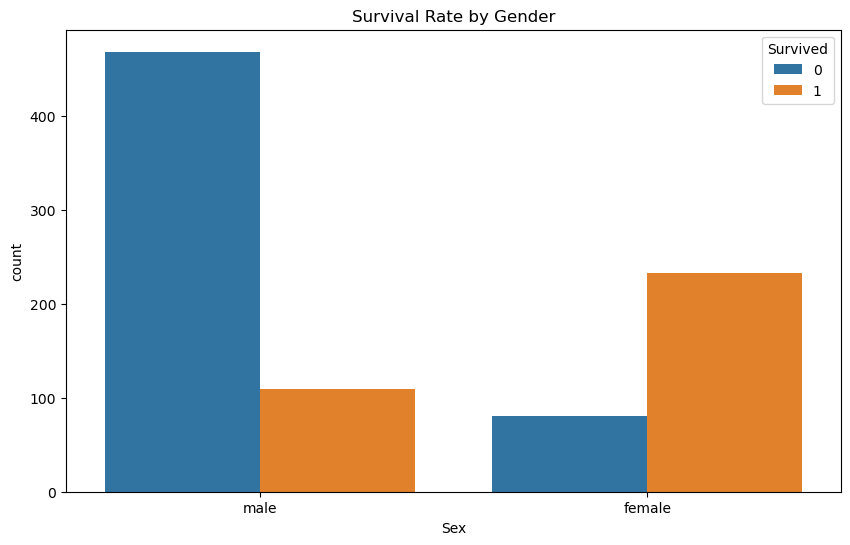

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic) 
plt.title('Survival Rate by Gender') 
plt.show()

#### iii) Age Distribution By Survival

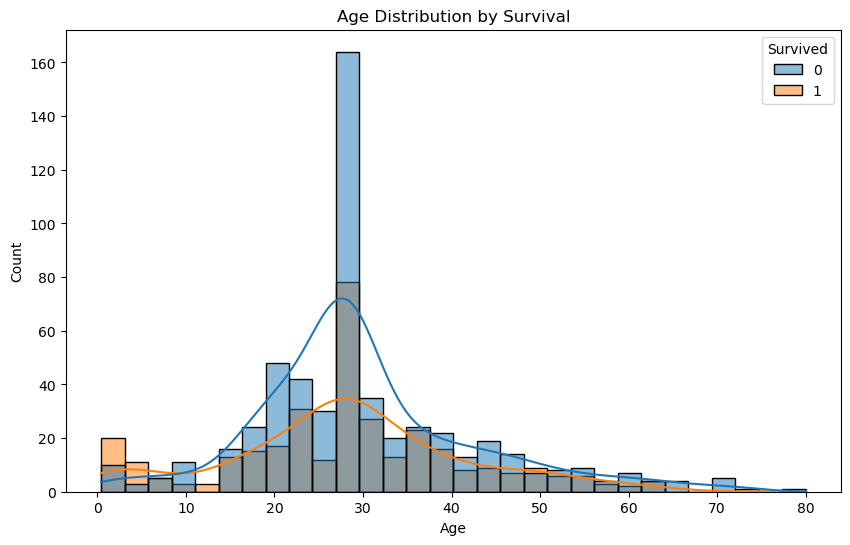

In [30]:
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x='Age',hue='Survived',kde=True) 
plt.title('Age Distribution by Survival')
plt.show()

#### 3) Correlations

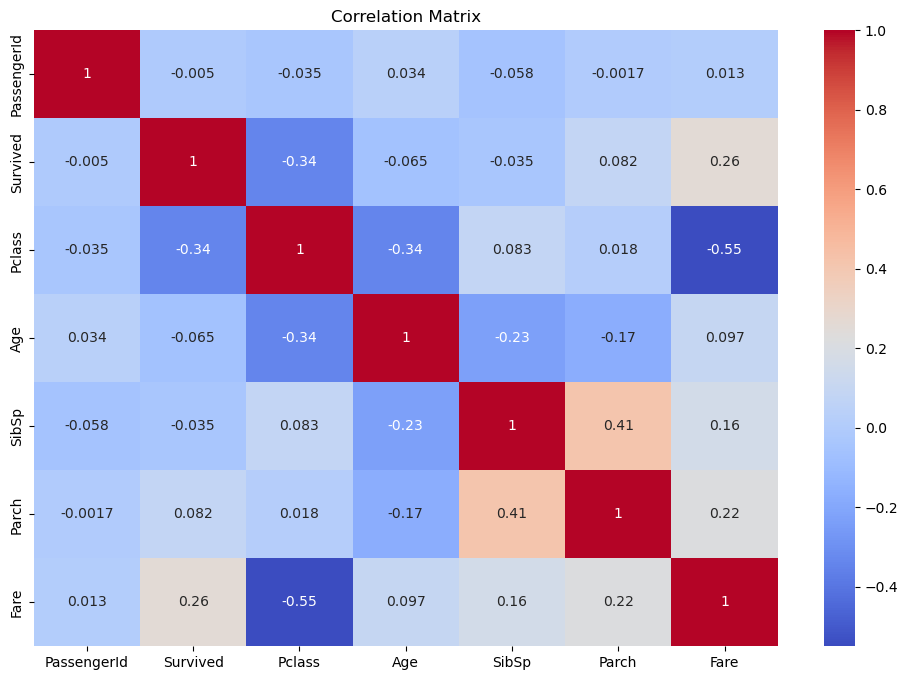

In [34]:
# Remove non-numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

plt.figure(figsize=(12, 8)) 
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix')
plt.show()

C:\Users\pkg15\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\pkg15\AppData\Local\Temp\ipykernel_20656\417429617.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


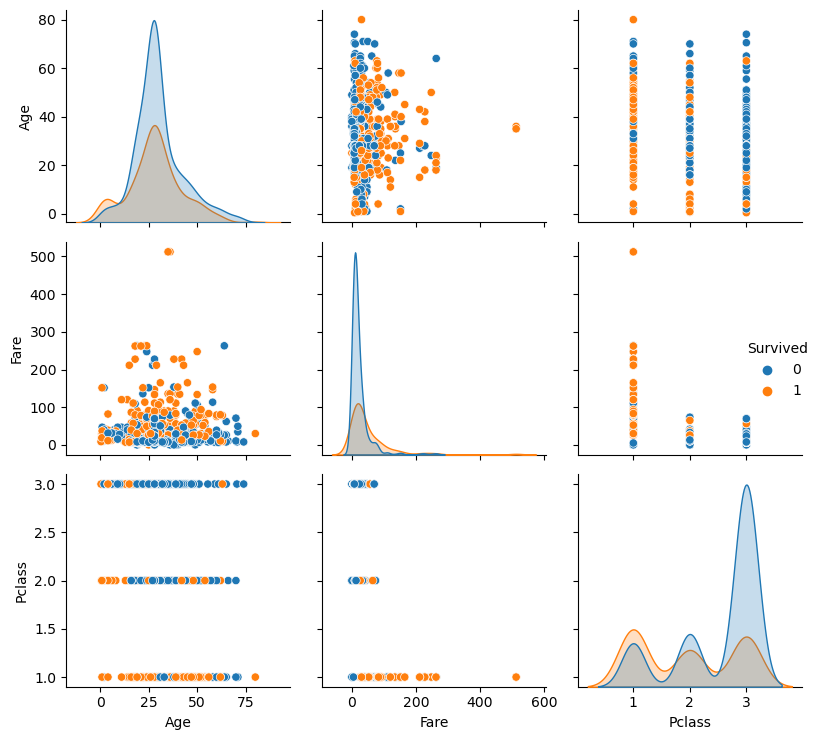

In [37]:
sns.pairplot(df, hue='Survived', vars = ['Age', 'Fare','Pclass'])
plt.tight_layout()
plt.show()